<a href="https://colab.research.google.com/github/shaiksuhail-824/eda_titanic_analysis/blob/main/eda_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Dataset Overview

The purpose of this section is to gain clear understanding of the dataset's structure and quality.
This inlcude examining the number of observaton and features,identify the datatypes and delecting missing values and reviewing the statiscal properties of numerical variables.
This step is ensure the dataset is suitable for further analysis and modeling.

In [3]:
df.shape

(891, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
cols = df.columns.tolist()
cols

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [7]:
df.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object


### Gender Distribution

This visualization helps to examine the distribution of male and female in the dataset.

understanding gender composition is important,as gender plays significant role in the survival outcomes.

The plot show the count of passenger in each gender,helping identify any imbalance in dataset.


In [8]:
gender_counts = df.sex.value_counts()
genders = gender_counts.index
values = gender_counts.values
genders,values



(Index(['male', 'female'], dtype='object', name='sex'), array([577, 314]))

<BarContainer object of 2 artists>

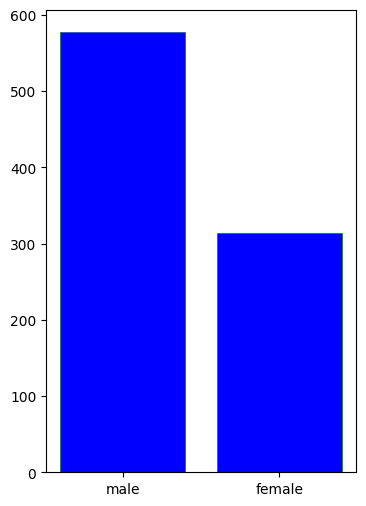

In [9]:
plt.figure(figsize = (4,6))
plt.bar(genders,values,color = "blue",edgecolor = "green",linewidth = 0.5)

### Distribution of Survival Status



The visualization shows the distribution of passenger who is survived and those who dit not survive.

It provide an overview of survival outcomes and serve as base line to further analysis.

The plot highlight the proportion of the passenger in each survival category.(Alive or Not Alive)



Text(0.5, 1.0, 'Distribution of alive')

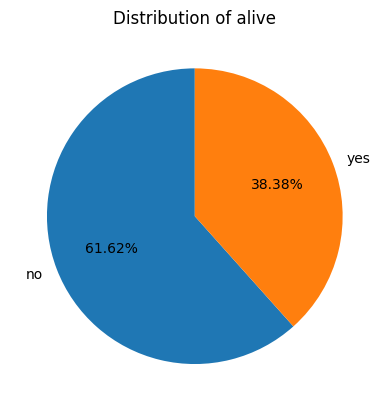

In [10]:
alive_counts = df["alive"].value_counts()
alive_counts
alive_values = alive_counts.values
alive_index = alive_counts.index
alive_values
plt.pie(alive_values,labels = alive_index,autopct="%1.2f%%",startangle = 90)
plt.axis()
plt.title("Distribution of alive")


In [11]:
data = df.groupby(["sex","age","alive"]).size().reset_index().rename(columns = {0:"alive_count"})
display(data)

,sex,age,alive,alive_count
0,female,0.75,yes,2
1,female,1.00,yes,2
2,female,2.00,no,4
3,female,2.00,yes,2
4,female,3.00,no,1
...,...,...,...,...
211,male,70.00,no,2
212,male,70.50,no,1
213,male,71.00,no,2
214,male,74.00,no,1


### Age Distribution of Surviving Passengers

The visualization examines the age distribution of passenger who survived the diaster.

Analyzing ages of surviving passengers helps identify which age group had higher survival rates such as children or younger adults.

The plot illustrates how survival is distibuted across different age ranges

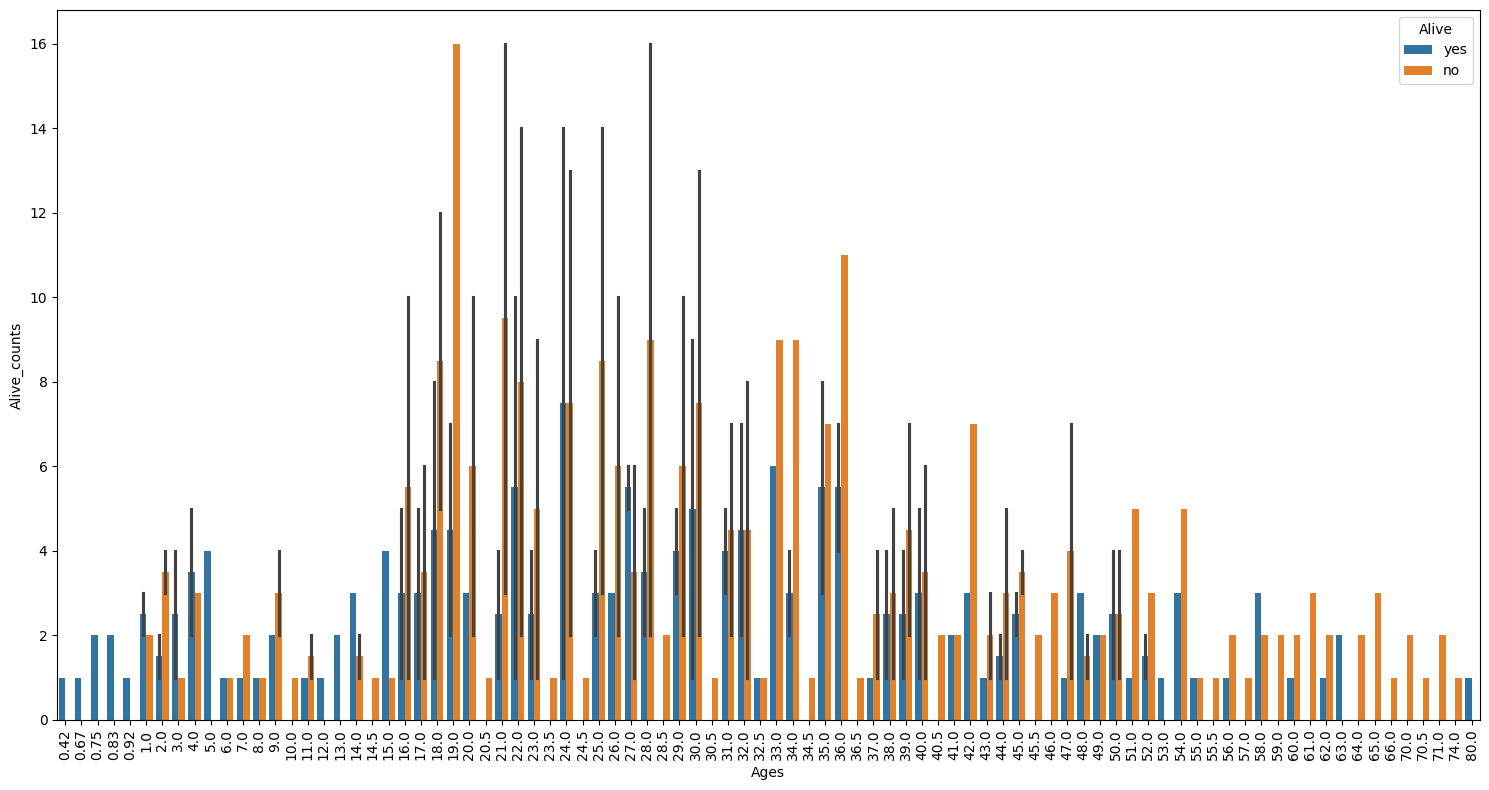

In [12]:
plt.figure(figsize = (15,8))
sns.barplot(x = "age",y = "alive_count",hue = "alive",data = data)
plt.xlabel("Ages")
plt.ylabel("Alive_counts")
plt.legend(title = "Alive")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()


### Age distribution of passengers

The histplot illustrates the distribution of passenger age in dataset.

Missing age values are excluded to ensure accurate representation.

The visualization helps identify most common age groups,the overall spread of ages,and whether the age distribution is skewed is towards younger or older passengers

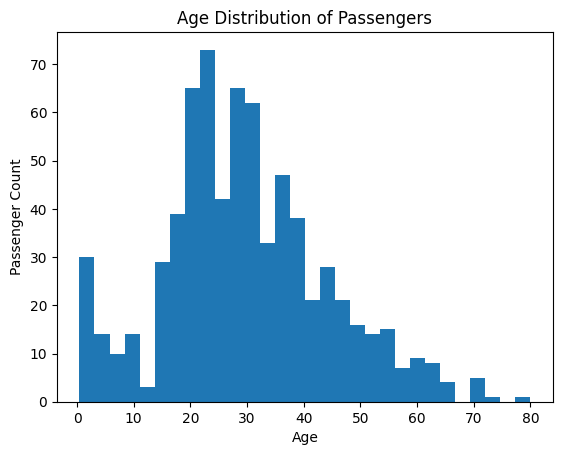

In [13]:
plt.hist(df["age"].dropna(),bins = 30)
plt.xlabel("Age")
plt.ylabel("Passenger Count")
plt.title("Age Distribution of Passengers")
plt.show()

### Distribution of numerical Features

This section visualize the ditribution of all numerical values in dataset by using histogram with kernal density estimates(KDE).

Analyzing numerical features of distrubution helps in understanding central density,spread and shape of data.

Skewness values are included whether identify the each feature is symmetric or skew,where is important for seleting appropriate data transformation and modeling techniques.

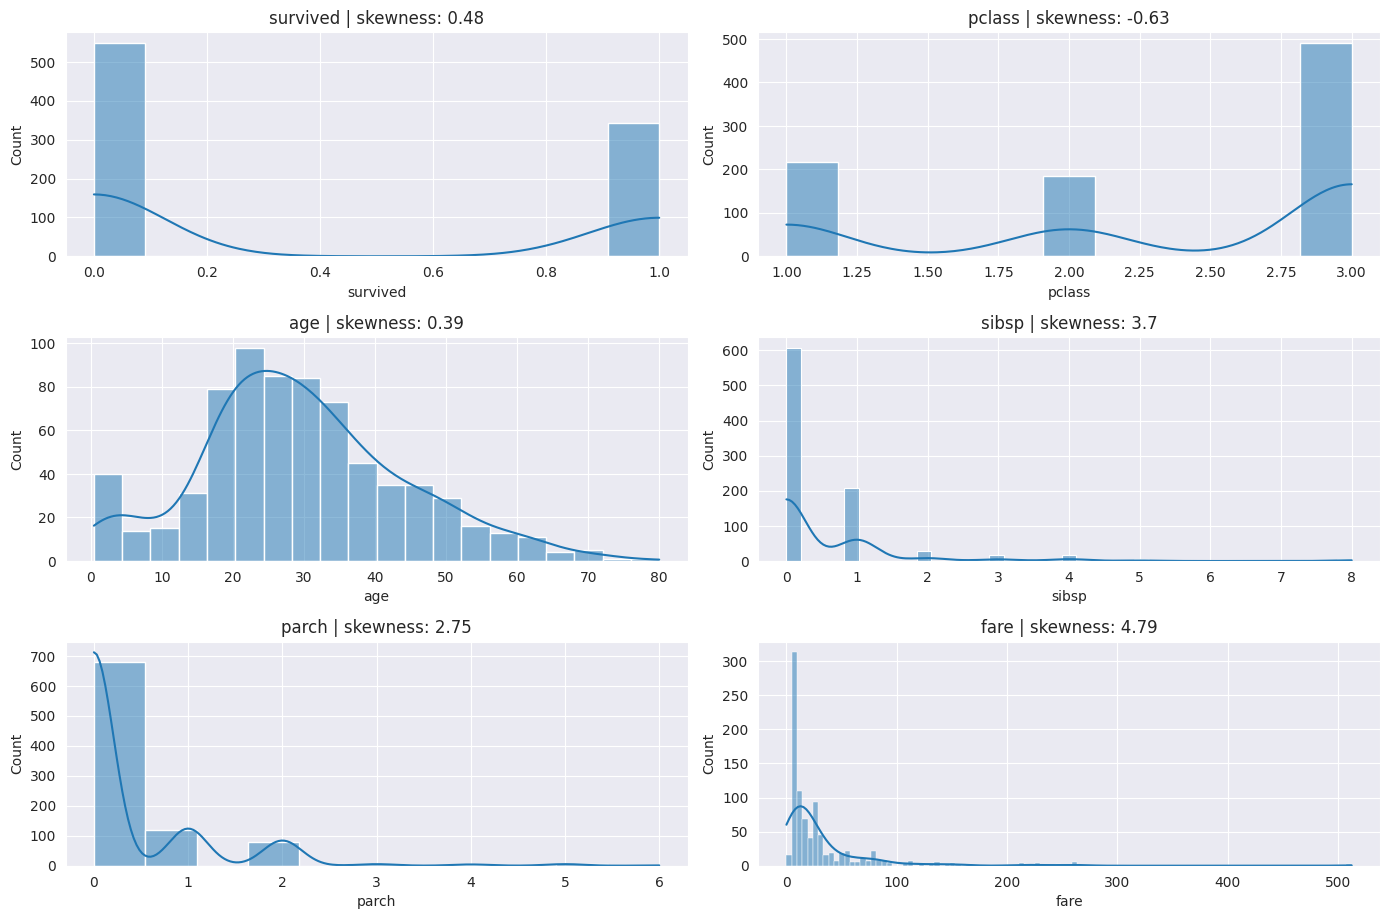

In [14]:
sns.set_style("darkgrid")
numerical_columns = df.select_dtypes(include = ("int64","float64")).columns  #select only numerical values

plt.figure(figsize = (14,len(numerical_columns)*3))
for idx ,feature in enumerate(numerical_columns,1): #idx is index ,feature is column name
      plt.subplot(len(numerical_columns),2,idx) # col,row,index\
      sns.histplot(df[feature],kde = True)
      plt.title(f"{feature} | skewness: {round(df[feature].skew(),2)}")
plt.tight_layout()

### Survival status and Fare

The stripplot visualizes the relationship between the passenger of survival status and fare paid.


It helps examine how fare values are distributed for passengers who is survived verses those who did not.

The visualization suggest that passengers who paid higher fare generally had higher a likelihood of survival,indicating that fare-often associated with passenger class-may be important factor influencing survival outcomes.

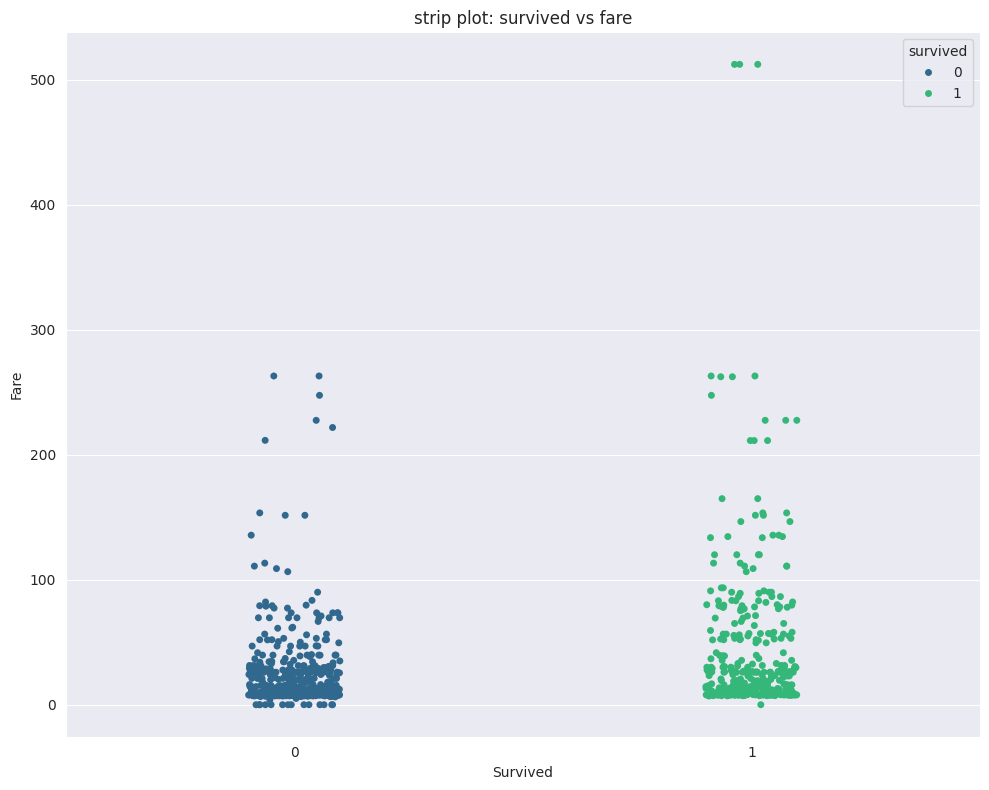

In [26]:
plt.figure(figsize = (10,8))
sns.stripplot(x ="survived",y = "fare",data =  df,hue = "survived",palette = "viridis")
plt.title("strip plot: survived vs fare")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.tight_layout()

### Pairwise Relationship Between Numerical Features

The pair plot visualizes the pair relationship among the numerical features ,with  points colored by survival status.

It helps identify trends,pattern and potential separation between survived and non survived feature combination.

The visualization also highlight the correlation between numerical features and provides insight into which feature is most informative for predicting survival.

<Figure size 1000x600 with 0 Axes>

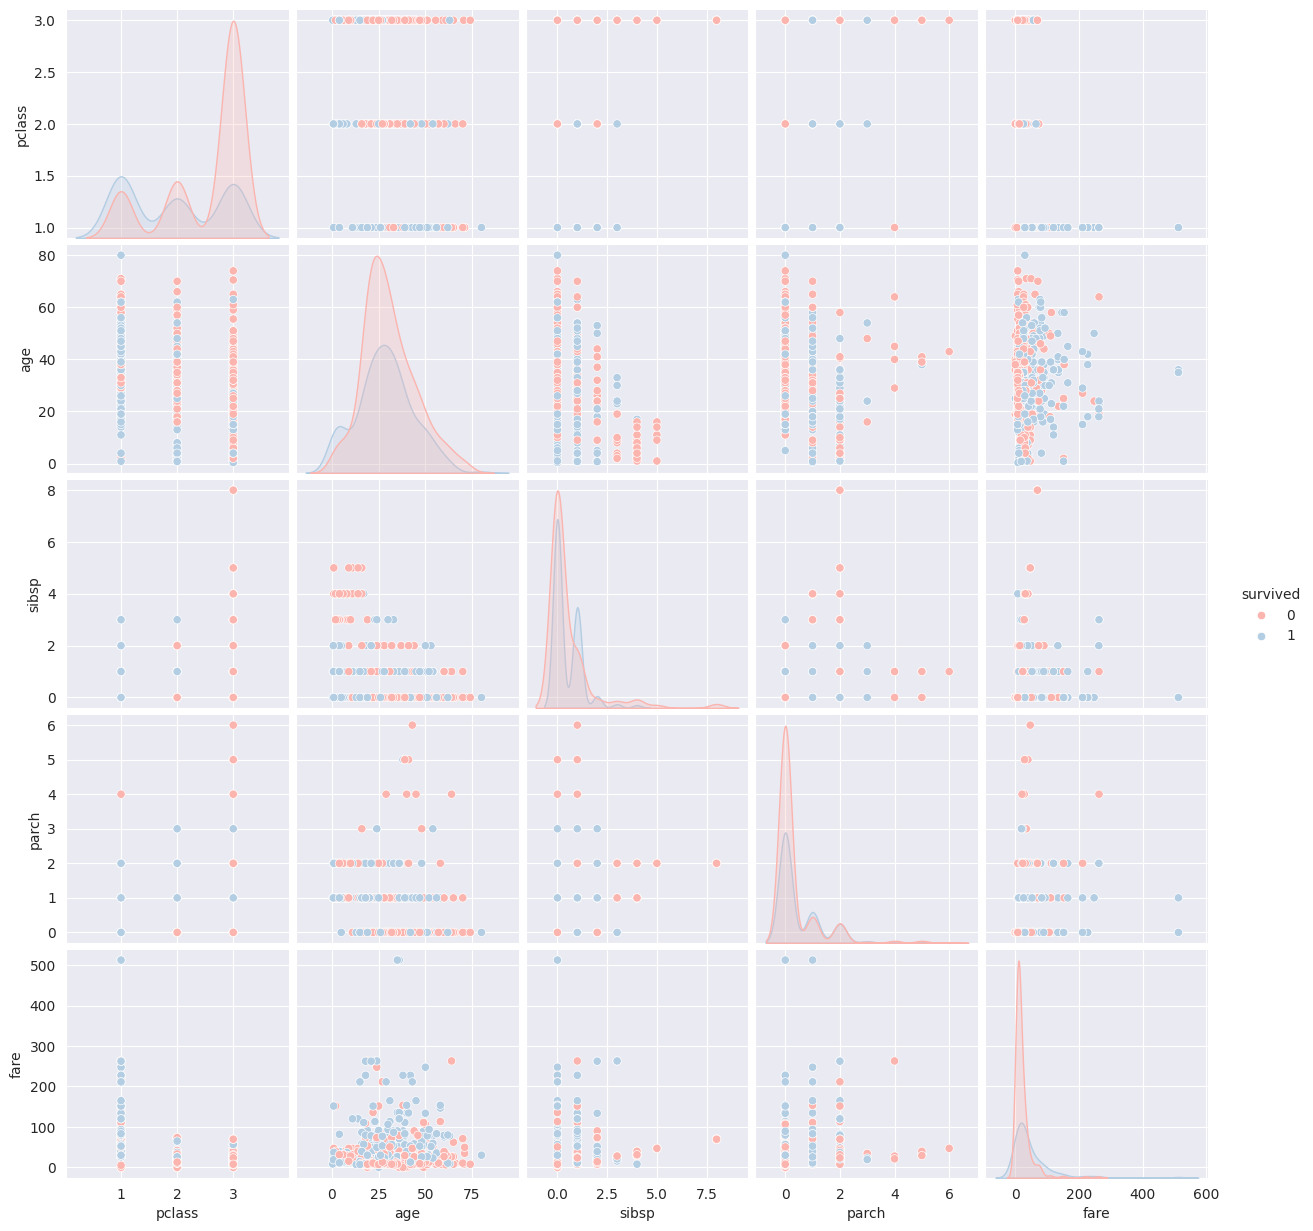

In [16]:
sns.set_palette("Pastel1")
plt.figure(figsize = (10,6))
sns.pairplot(df[numerical_columns],hue = "survived")

### Age Distribution by Survival Status

The voilin plot visualizes the distribtuion of passenger ages of both survived and non survived groups.

It helps examine how ages influenced survival by comparing density and spread of ages across the two outcomes.

The plot hightlight difference age pattern ,such as higher survival rate among certain age groups.

Text(0.5, 1.0, 'violin plot : Age distribution by survival')

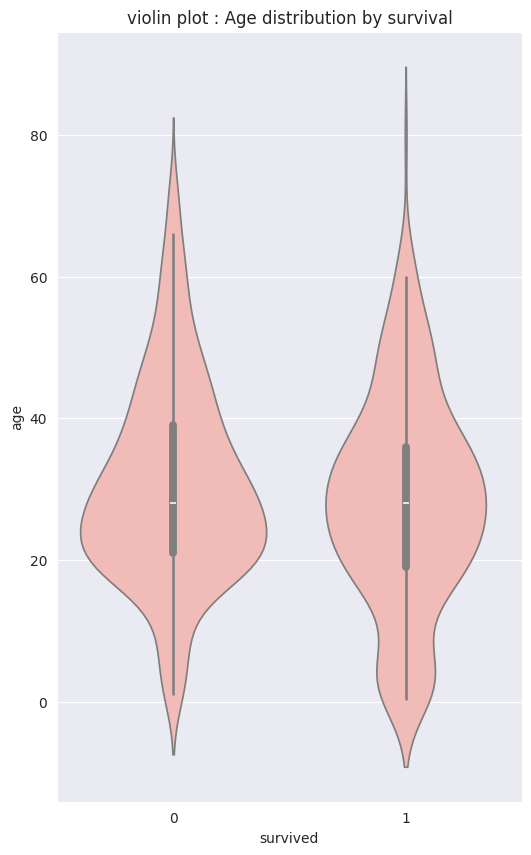

In [17]:
plt.figure(figsize = (6,10))
sns.violinplot(x = "survived",y = "age",data = df)
plt.title("violin plot : Age distribution by survival")

<Axes: xlabel='survived', ylabel='age'>

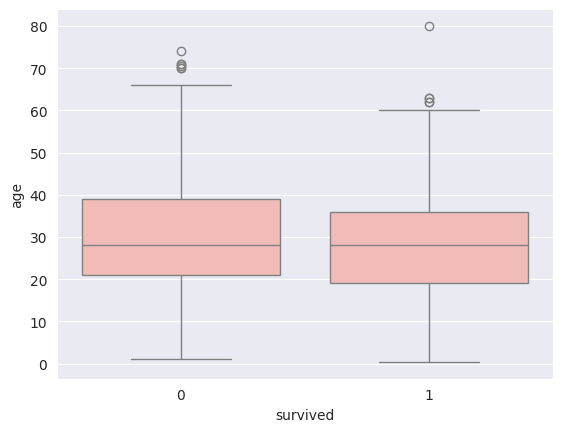

In [18]:
sns.boxplot(x  = "survived",y = "age",data = df)


### Correlation Between Numerical Features

The visualization presents the correlation relationshp between among numerical features in the dataset

It helps identify the strenght and direction of linear relationship between variables.

Highly correlated features may indicate redundancy,while weak correlations independent features,which is useful for feature selecton and model building.

<Axes: >

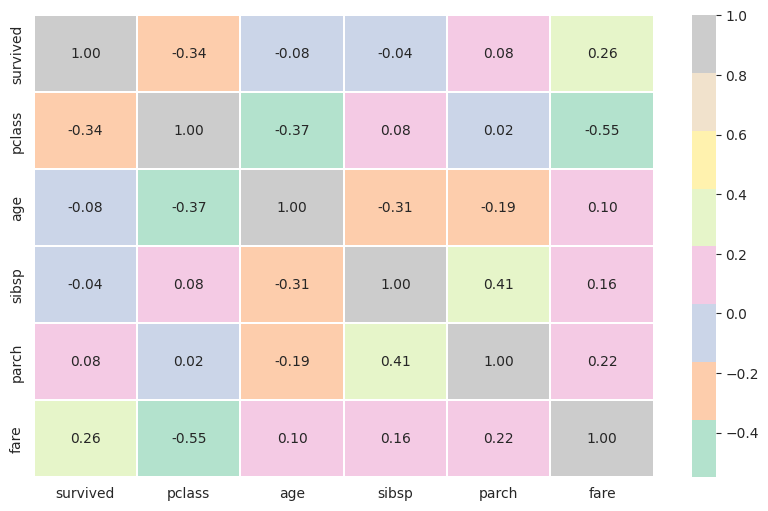

In [19]:
plt.figure(figsize = (10,6))
sns.heatmap(df[numerical_columns].corr(),annot = True,fmt = ".2f",cmap = "Pastel2",linewidth = 0.2)